<br> <br>

- Complete rest of the EDA Analysis on Sunday. See Google Calendar for more details. (6/8)


**Note to Self:** 
<br>
- Make sure I understand the plots and graphs thoroughly before adding the Project to Resume.
<br>
- Understand how box-plots work.
<br> 
- In case I am not able to understand some graph, remove it from the Project without hesitation.
<br> <br>
- Understand differnt types of distributions - Normal, Standard,.. thoroughly. (with formulae, if poss.)

<br> <br>

# End-to-end Machine Learning Project on Predicting Medical Insurance Costs
<br/>
 <img src="picture.jpg" width=600 height=400 />

<br/>

* A machine learning model that is trained on "Medical Cost Personal Datasets" dataset from the Open Data Commons repository.
* We are doing supervised learning here and our aim is to do predictive analysis.
* During our journey we'll understand the important tools needed to develop a powerful ML model.
* Our model will help us in predicting medical insurance cost incurred by a patient in the future.
* We'll validate it against our test dataset.

**To do an end-to-end Machine Learning project we need to do the following steps**
<br/>
1. Understand the features influencing the price of health insurance
2. Perform Explolatory Data Analysis to understand our data better.
3. Data Modelling and Evaluation
4. Arriving at a conclusion.


# 1.  Which Factors Influence the Price of Health Insurance?

Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost:

* age: age of primary beneficiary
<br/>

* sex: insurance contractor gender. Male or Female.
<br/>
* bmi: body mass index, providing an understanding of body. Ideally 18.5 to 24.9
<br/>
* children: number of children covered by health insurance.
<br/>
* smoker: does the person smoke?
<br/>
* region: the beneficiary's residential area in the US - northeast, southeast, southwest, northwest

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 2. Exploratory Data Analysis 

## Data Summary

In [3]:
df.iloc[:,[0,2,6]].describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


* **Age** is ranging from 18 to 64 ,with mean of 38.2 and standard deviation of 14.05
* **bmi** is ranging from 15.96 to 53.13 , with mean of 30.6 and standard deviation of 6.09
* **charges** is ranging from 1121 to 63770 , with mean of 13270 and standard deviation of 12110

## Age Distribution

<AxesSubplot:xlabel='age', ylabel='Density'>

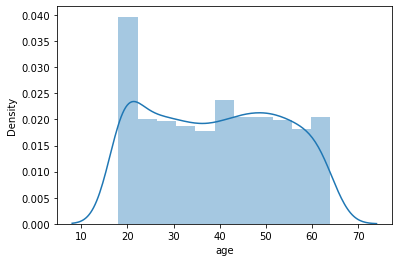

In [4]:
sns.distplot(df['age'])

* Clearly, age follows normal distribution.
* Maximum no. of patients fall in the age group of 18-22.

## Age vs BMI

<AxesSubplot:xlabel='age', ylabel='bmi'>

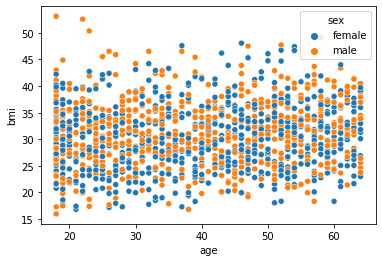

In [5]:
sns.scatterplot(x="age", y="bmi", hue='sex',data=df,color='red')

* No relation between age of patient and bmi of patient

## Age Distribution - Smoker vs Non-Smoker

<AxesSubplot:xlabel='smoker', ylabel='age'>

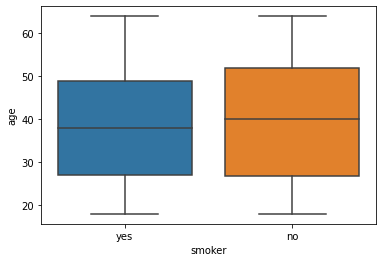

In [6]:
sns.boxplot(x='smoker',y='age',data=df)

Text(0.5, 1.0, 'Distribution of ages of non smoker')

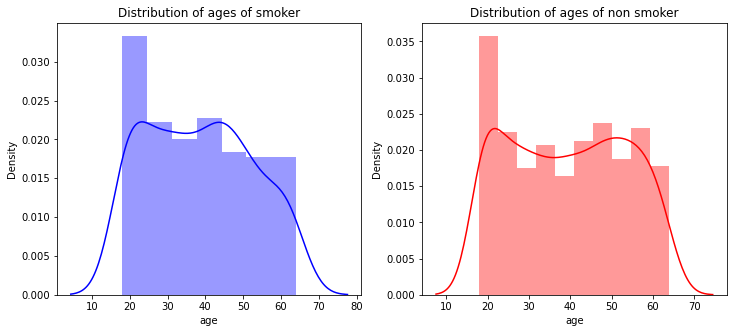

In [7]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 'yes')]["age"],color='blue',ax=ax)
ax.set_title('Distribution of ages of smoker')

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker == 'no')]['age'],color='red',ax=ax)
ax.set_title('Distribution of ages of non smoker')

* Clearly, there is very slight change in distribution of smoker and non smoker. 
* Also there is spike in percentage of smokers in the age group 18-22

## Genderwise Smoker Count 

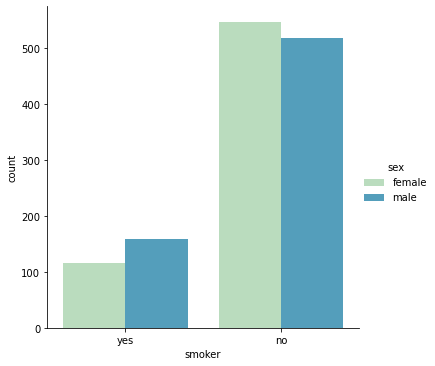

In [8]:
sns.catplot(x="smoker", kind="count",hue = 'sex',palette='GnBu',data=df)

* No. of *non-smokers > No. of smokers*
<br>
* Amongst the smokers, *male smokers > female smokers*. However the differnce is not large.

## Cost Distribution - smokers vs  non-smokers

<AxesSubplot:xlabel='smoker', ylabel='charges'>

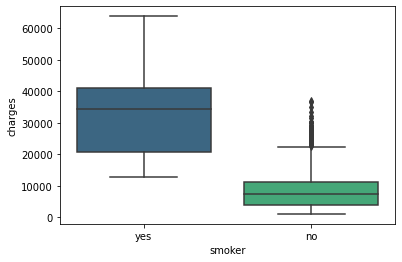

In [9]:
sns.boxplot(x='smoker',y='charges',palette='viridis',data=df)

Text(0.5, 1.0, 'Distribution of charges of non smoker')

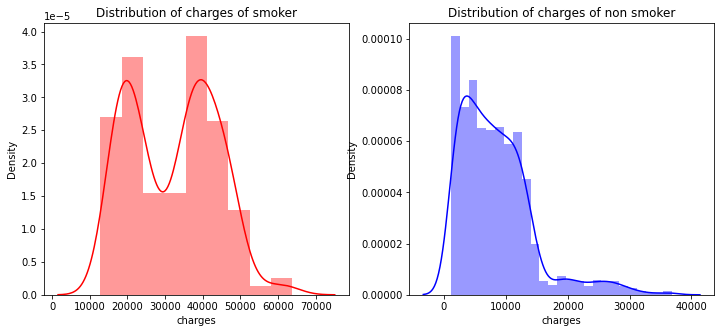

In [10]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 'yes')]["charges"],color='red',ax=ax)
ax.set_title('Distribution of charges of smoker')

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker == 'no')]['charges'],color='blue',ax=ax)
ax.set_title('Distribution of charges of non smoker')

* Patients who smoke tend to incur higher insurance costs. **(Imp)**

## Correlation Matrix

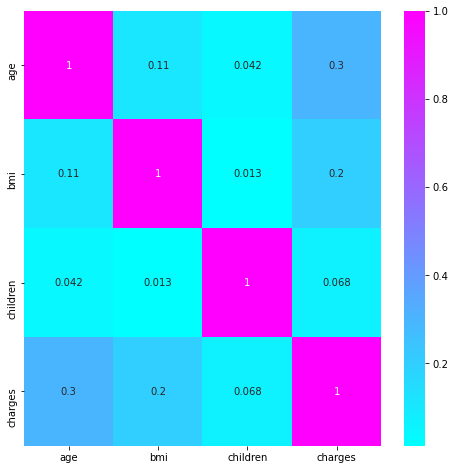

In [11]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

No correlation found, except with smoking.

# 3. Data Modelling and Evaluation

## Taking Care of Missing Data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


 **Note:** <br> 
 We clearly observe no null entries are present in the dataset. <br> 
 Hence, no need to do anything. We can simply proceed further.<br> 

## Encoding Categorical Variables

In [13]:
df = pd.get_dummies(df, columns = ['sex','smoker','region'], drop_first = True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


## Train Test Split

In [14]:
X = df.loc[:,df.columns != 'charges'].values
y = df.loc[:,['charges']].values

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

## Linear Regression (Score = 80.00%)

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred = regressor.predict(X_test)

y_pred = y_pred.reshape(len(y_pred),1)
y_test = y_test.reshape(len(y_test),1)

In [18]:
score = r2_score(y_test, y_pred) 
print(score)

0.7999876970680434



## Polynomial Regression (Score = 84.99%)

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree=2
polyreg = make_pipeline(PolynomialFeatures(degree),LinearRegression())

polyreg.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [20]:
y_pred = polyreg.predict(X_test)

y_pred = y_pred.reshape(len(y_pred),1)
y_test = y_test.reshape(len(y_test),1)

In [21]:
score = r2_score(y_test, y_pred) 
print(score)

0.8498629066540622


## Decision Tree Regression (Score = 69.61%)

In [22]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)

regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [23]:
y_pred = regressor.predict(X_test)

y_pred = y_pred.reshape(len(y_pred),1)
y_test = y_test.reshape(len(y_test),1)

In [24]:
score = r2_score(y_test, y_pred) 
print(score)

0.6960817962961159


## Random Forest Regression (Score = 86.51%)

In [25]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [26]:
y_pred = regressor.predict(X_test)

y_pred = y_pred.reshape(len(y_pred),1)
y_test = y_test.reshape(len(y_test),1)

In [27]:
score = r2_score(y_test, y_pred) 
print(score)

0.8651385046998831


# 4. Conclusion

* **Smoking** has proven to be the **biggest factor** of high medical insurance costs. 
<br> <br>
* **Age** and **bmi** are other important factors.
<br> <br>
* **Random Forest Regressor** has turned out to be the best model, with a score of **86.51%**, closely followed by **Polynomial Regressor** with a score of **84.99 %**